## Covariances in Data Frames for predictive modeling

Coffeine is designed for building biomedical prediction models from M/EEG signals. The library provides a high-level interface facilitating the use of M/EEG covariance matrix as representation of the signal. The methods implemented here make use of tools and concepts implemented in [PyRiemann](https://pyriemann.readthedocs.io/). The API is fully compatible with [scikit-learn](https://scikit-learn.org/)).

In [1]:
# this is a hidden cell (see metadata)
import mne
mne.utils.set_log_level('critical')

In [2]:
import mne
from coffeine import compute_coffeine, make_filter_bank_regressor

# load EEG data from linguistic experiment
eeg_fname = mne.datasets.kiloword.data_path() / "kword_metadata-epo.fif"
epochs = mne.read_epochs(eeg_fname)[:50]  # 50 samples

# compute covariances in different frequency bands 
X_df, feature_info = compute_coffeine(  # (defined by IPEG consortium)
    epochs, frequencies=('ipeg', ('delta', 'theta', 'alpha1'))
)  # ... and put results in a pandas DataFrame.
y = epochs.metadata["WordFrequency"]  # regression target

# compose a pipeline
model = make_filter_bank_regressor(method='riemann', names=X_df.columns)
model.fit(X_df, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('projcommonspace',
                                                                   ProjCommonSpace(reg=1e-05)),
                                                                  ('riemann',
                                                                   Riemann())]),
                                                  'delta'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('projcommonspace',
                                                                   ProjCommonSpace(reg=1e-05)),
                                                                  ('riemann',
                                                                   Riemann())]),
                                                  'theta'),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('projc...
       1.38488637e+03, 1.66810054e+03, 2.00923300e+03, 2.42012826e+03,
       2.91505306e+03, 3.51119173e+03, 4.22924287e+03, 5.09413801e+03,
       6.13590727e+03, 7.39072203e+03, 8.90215085e+03, 1.07226722e+04,
       1.29154967e+04, 1.55567614e+04, 1.87381742e+04, 2.25701972e+04,
       2.71858824e+04, 3.27454916e+04, 3.94420606e+04, 4.75081016e+04,
       5.72236766e+04, 6.89261210e+04, 8.30217568e+04, 1.00000000e+05])))])

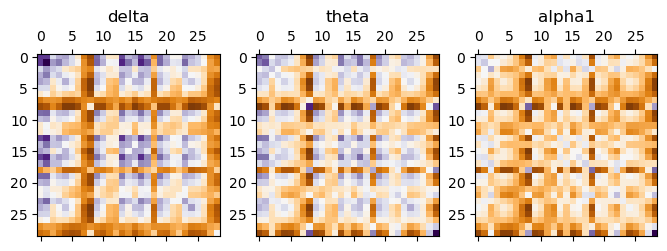

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ii, name in enumerate(('delta', 'theta', 'alpha1')):
    axes[ii].matshow(X_df[name].mean(), cmap='PuOr')
    axes[ii].set_title(name)

## Background

For this purpose, `coffeine` uses DataFrames to handle multiple covariance matrices alongside scalar features. Vectorization and model composition functions are provided that handle composition of valid [scikit-learn](https://scikit-learn.org/) modeling pipelines from covariances alongside other types of features as inputs.

The filter-bank pipelines (e.g. across multiple frequency bands or conditions) can the thought of as follows:

![](https://user-images.githubusercontent.com/1908618/115611659-a6d5ab80-a2ea-11eb-935c-006cad4fc8e5.png)
**M/EEG covariance-based modeling pipeline from [Sabbagh et al. 2020, NeuroImage](https://doi.org/10.1016/j.neuroimage.2020.116893https://doi.org/10.1016/j.neuroimage.2020.116893)**

After preprocessing, covariance matrices can be ___projected___ to a subspace by spatial filtering to mitigate field spread and deal with rank deficient signals.
Subsequently, ___vectorization___ is performed to extract column features from the variance, covariance or both.
Every path combnining different lines in the graph describes one particular prediction model.
The Riemannian embedding is special in mitigating field spread and providing vectorization in 1 step.
It can be combined with dimensionality reduction in the projection step to deal with rank deficiency.
Finally, a statistical learning algorithm can be applied.

The representation, projection and vectorization steps are separately done for each frequency band (or condition).

## Installation of Python package

<!-- To install the package, simply do: -->
<!--  -->
<!--   `$ pip install coffeine` -->

You can clone this library, and then do:

  `$ pip install -e .`

Everything worked if the following command do not return any error:

  `$ python -c 'import coffeine'`
